# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеки, необходимые для исследования (Pandas), cоставляем первое представление о данных: читаем файл и сохраняем его в переменной data:

In [1]:
#импорт библиотек
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#открываем и сохраняем как датафрейм файл с данными:

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


Выведем на экран первые пять строк таблицы:

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Получим общую информацию о таблице:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Описание данных:
В таблице 22 столбцa. Тип данных в столбцах —bool, object, int64 и float64.

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
+ ponds_around3000 — число водоёмов в радиусе 3 км
+ ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
+ total_images — число фотографий квартиры в объявлении

Для просмотра статистической сводки каждого столбца, чтобы узнать распределение данных в каждом столбце используется метод describe( ). Этот метод показывает нам количество строк в столбце - count, среднее значение столбца - mean, столбец стандартное отклонение - std, минимальные (min) и максимальные (max) значения, а также границу каждого квартиля - 25%, 50% и 75%. Любые значения NaN автоматически пропускаются.

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Постройм общую гистограмму для всех числовых столбцов таблицы.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

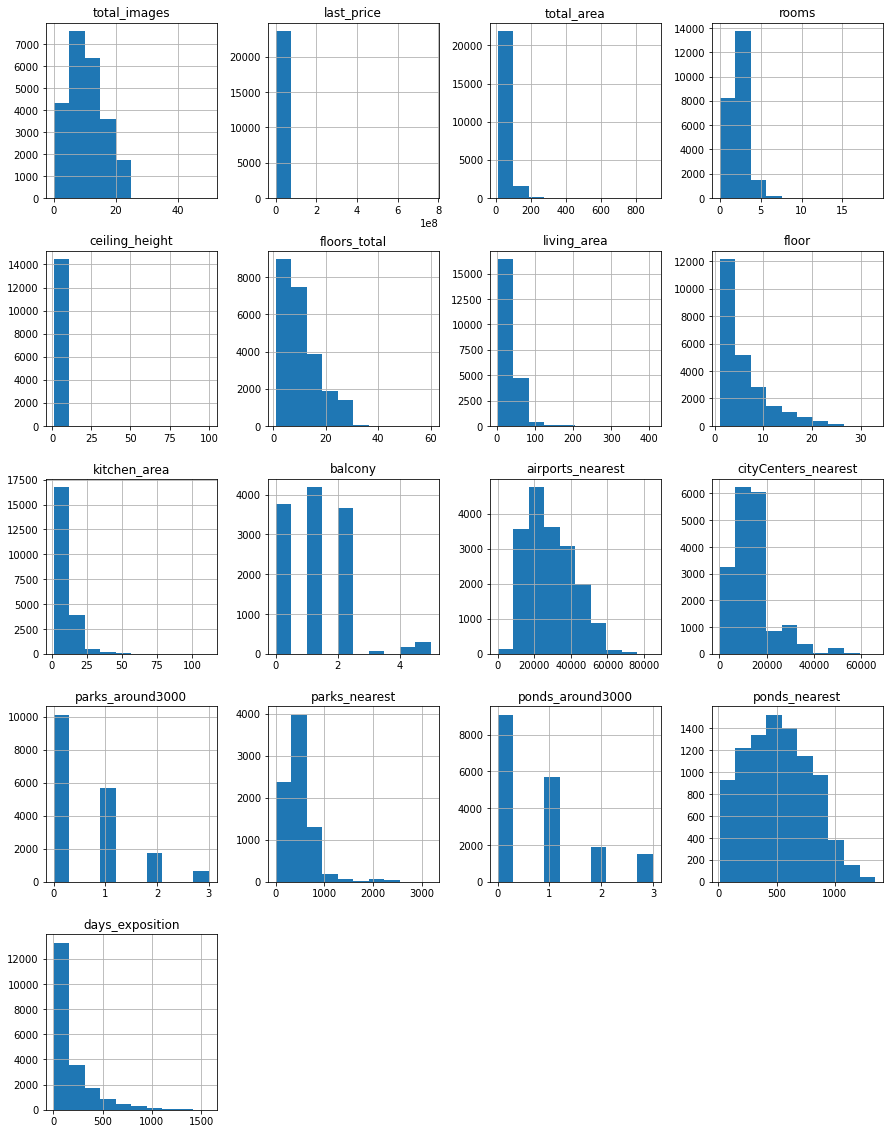

In [6]:
data.hist(figsize=(15, 20))

#### Вывод

Возможно это технические ошибки при выгрузке, либо выгрузка из нескольких источников, котоыре были заполнены по-разному, либо просто бессистемное заполнение данных исполнителем.

видно явное несоотвествие типов, необходимо перевести данные:

в формат int из формата float:

last_price
floors_total
balcony
parks_around3000
parks_nearest
ponds_around3000
ponds_nearest
airports_nearest
cityCenters_nearest
days_exposition
в формат bool из формата object:

is_apartment
в формат даты

first_day_exposition object
в названии колонок 'parks_around3000, 'ponds_around3000', 'cityCenters_nearest' присутствует нарушение стиля:

не соблюден snake case,
присутствуют прописные буквы.


В каждой строке таблицы — данные о конкретной квартире, выставленной на продажу. По каждой квартире доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но данные, скорее всего, взяты из разных источников, что является результатом пропусков значений в некоторых столбцах, а также предположительны ошибки при выгрузке и из-за некорректного заполнения первоисточников исполнителем.

Для корректного анализа попытаемся устранить выявленные ошибки, для чего проведем более подробную проверку каждого столбца в следующем разделе.

### Предобработка данных

#### Исследование и заполнение пропусков в данных

Приведение названия столбцов 'parks_around3000, 'ponds_around3000', 'cityCenters_nearest' к общему стилю:

In [7]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
#переименование колонок (исправление стиля)
data = data.rename(
    columns={'parks_around3000':'parks_around_3000', 
             'ponds_around3000':'ponds_around_3000', 
             'cityCenters_nearest':'city_centers_nearest'}
)

#проверяем внесение изменений:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [9]:
#проверка цены на "здравый смысл":
display(data.loc[(data['last_price']<1000000)& (data['locality_name']=='Санкт-Петербург' )])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Выявлена одна квартира стоимостью 12 190 руб. Вероятно стоимость проставлена в тыс.руб.,- заменим их вручную:

In [10]:
data.loc[8793, 'last_price'] = 12190000
display(data.loc[(data['last_price']<1000000)& (data['locality_name']=='Санкт-Петербург' )])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [11]:
# перевод данных в формат даты:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


#проверяем внесение изменений в тип данных
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Проверим данные по недвижимости с нулевым количеством комнат:

In [12]:
data.query('rooms == 0 and (open_plan == True or studio == True) ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.00,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.00,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Как видим, все они- либо с признаком квартиры-студии, либо со свободной планировкой. Будем считать, что это реальная особенность определенного типа жилья.

Тем не менее, для единообразия проверим количество комнат во всех студиях:

In [13]:
print(len(data.query('studio == True')))

#уникальные значения кол-ва комнат:
data.query('studio == True')['rooms'] .value_counts()

149


0    138
1     11
Name: rooms, dtype: int64

Как видим, в основном в студиях указано количество комнат, равное 0 (138 значений). Поскольку студия предполагает одно свободное пространство, совмещающее комнату и кухню и не делится на комнаты, для единообразия заменим 1 (11 значений) на 0:

In [14]:
#присваиваем значение '0' в ячейках со значением '1':
data.loc[(data['rooms'] == 1) & (data['studio']==True),'rooms'] = 0

#проверим внесение изменений
data.query('studio == True')['rooms'] .value_counts()

0    149
Name: rooms, dtype: int64

В целом не выявлено проблем, связанных со значениями столбца, но для единообразия значения комнат, равные "1" , в студиях заменены на "0"

In [15]:
# Заменяем оставшиеся пустые значения высоты потолков на медианное значение по всему датасету
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

# Смотрим количество пропущенных значений
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Поскольку выяснить количество этажей в доме не представляется возможным, а количество пропусков невелико, удалим пропуски данных этого столбца:

In [16]:
data = data.dropna( subset=['floors_total'])

# Смотрим количество пропущенных значений
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around_3000        5508
parks_nearest           15568
ponds_around_3000        5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Ввиду того, что выяснить количество этажей в доме невозможно, строки с пропусками значений в столбце floors_total удалены.

In [17]:

# Заменяем пустые значения жилой площади
living_ratio = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)

# Выясняем количество значений в аппартаментах. Всего аппартаменты - 50. Заменяем пропущенные значения на нет
data['is_apartment'] = data['is_apartment'].fillna(value=False).astype('int')

# Заменяем пустые значения площади кухни
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

# Приводим в целочисленный тип количество балконов. Заменяем пропущенные значения на 0
data['balcony'] = data['balcony'].fillna(value=0).astype('int')

#Пропуски значений столбца parks_around_3000 заполнены значением "0"
data['parks_around_3000'] = data['parks_around_3000'].fillna(value=0).astype('int')

#Пропуски значений столбца ponds_around_3000 заполнены значением "0"
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(value=0).astype('int')

#удаление пропусков столбца locality_name
data = data.dropna(subset=['locality_name']) 
data['locality_name'].isna().sum() #проверка

# Проверяем количество пропущенных значений
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000           0
parks_nearest           15535
ponds_around_3000           0
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### Изменение типов данных

In [18]:
#применяем метод astype() для изменения формата столбцов из df_format

data['is_apartment'] = data['is_apartment'].astype('bool')
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

#проверяем внесение изменений в тип данных
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000                int64
parks_nearest                  float64
ponds_around_3000                int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [19]:
#проверка внесения изменений 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

#### Обработка неявных дубликатов

In [20]:
data['locality_name'].describe()

count               23565
unique                364
top       Санкт-Петербург
freq                15651
Name: locality_name, dtype: object

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [22]:

data['locality_name'].replace('поселок|городского типа|городской|деревня|коттеджный|село|посёлок|при железнодорожной станции|станции|садоводческое некоммерческое товарищество|садовое товарищество ', '' ,regex=True)

data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

#### Обработка и удаление аномалий (редких значений)

In [23]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    dataq = data.loc[(data[column] < q3 + 1.5*iqr) & (data[column] > q1 - 1.5*iqr), column]
    return dataq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

# Возвращаем в целочисленный тип число комнат
data['rooms'] = data['rooms'].fillna(0).astype(int)

# Изучаем, есть ли выбивающиеся значения
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.000000,2.151800e+04,22326.000000,23565.000000,21837.000000,23565.000000,22682.000000,23565.000000,22250.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,18721.000000
mean,9.878421,4.837339e+06,54.319704,2.013028,2.659333,10.675875,31.526821,5.878124,9.417841,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,128.299343
std,5.681156,2.215581e+06,19.331030,0.987466,0.143003,6.594823,13.752675,4.871485,3.177523,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,121.064671
min,0.000000,4.300000e+05,12.000000,0.000000,2.250000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.550000,5.000000,18.700000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,41.000000
50%,9.000000,4.400000e+06,50.000000,2.000000,2.640000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,85.000000
75%,14.000000,6.000000e+06,65.500000,3.000000,2.750000,16.000000,40.600000,8.000000,11.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,182.000000
max,50.000000,1.186686e+07,114.200000,5.000000,3.050000,60.000000,76.700000,33.000000,19.450000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,509.000000


В датафрейме отброшены значения на основе 1.5 размаха. Значения стали лучше и адекватнее.

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавление цены квадратного метра

In [24]:
#добавляем столбец price_sq_meter с расчетом 1 кв м
data['price_sq_meter'] =data['last_price'] / data['total_area']

#### Добавление дня недели, месяца и года публикации объявления

In [25]:
#добавление столбца с днем недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#добавление столбца с месяцем публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

#добавление столбца с годом публикации
data['year_exposition'] = data['first_day_exposition'].dt.year

#### Добавление этажа квартиры (первый, последний и другой)

In [26]:
#функция, определяющая категорию этажа:
def floors_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

#применяем метод apply и функцию floors_category к созданному столбцу floor_group:
data['floor_group'] = data.apply(floors_category, axis=1)  

#### Добавление соотношения жилой и общей площади, а также площади кухни к общей площади

In [27]:
#создаем столбец living_area_ratio и заполняем его соотношением жилой и общей площади:

data['living_area_ratio'] = data['living_area'] / data['total_area']

#создаем столбец kitchen_area_ratio и заполняем его соотношением площади кухни и общей площади:
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

#### Расстояние до центра города в километрах (переведино из м в км и округлите до целых значений)

In [28]:

data['city_centers_nearest_km'] = data['city_centers_nearest'].div(1000)
data['city_centers_nearest_km']

0        16.028
1        18.603
2        13.933
3         6.800
4         8.098
          ...  
23694     4.232
23695       NaN
23696       NaN
23697    10.364
23698       NaN
Name: city_centers_nearest_km, Length: 23565, dtype: float64

Проверим добавление столбцов, для чего выведем первые 5 строк датафрейма:

In [29]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_sq_meter,weekday_exposition,month_exposition,year_exposition,floor_group,living_area_ratio,kitchen_area_ratio,city_centers_nearest_km
0,20,NaN,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,NaN,3,3,2019,другой,0.472222,NaN,16.028
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277,18.603
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.3,4,False,...,574.0,NaN,92785.714286,3,8,2015,другой,0.612500,0.148214,13.933
3,0,NaN,NaN,2015-07-24,3,2.60,14,NaN,9,False,...,234.0,424.0,NaN,4,7,2015,другой,NaN,NaN,6.800
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,NaN,8.098


#### Вывод

Для дальнейшего анализа рассчитаны и добавлены отдельными столбцами значения цены 1 кв.м., дня недели, месяца и года объявления, категории этажа, соотношения жилой площади и площади кухни к общей.

### Проведите исследовательский анализ данных

#### Исследование параметров объектов: общей площади, жилой площади, площади кухни, цены, количества комнат и т.д.

In [30]:
#функция, получающая на вход название признака, и возвращающая границы "усов"
def kingston(column):
    stat = data[column].describe()
    
    # межквартирльный размах
    iqr = stat[6] - stat[4]
    
    # левый и правый "ус"    
    left_kingston = round(stat[4] - 1.5 * iqr, 2)
    right_kingston = round(stat[6] + 1.5 * iqr, 2)

    # левый "ус" не должен быть меньше минимального значения
    if left_kingston < stat[3]: left_kingston = stat[3] 
        
    # правый "ус" не должен быть больше максимального значения
    if right_kingston > stat[7]: right_kingston = stat[7]
        
    return [left_kingston, right_kingston]

##### Общая площадь

In [31]:
kingston('total_area')

[12.0, 104.65]

In [32]:
data['total_area'].describe()

count    22326.000000
mean        54.319704
std         19.331030
min         12.000000
25%         39.400000
50%         50.000000
75%         65.500000
max        114.200000
Name: total_area, dtype: float64

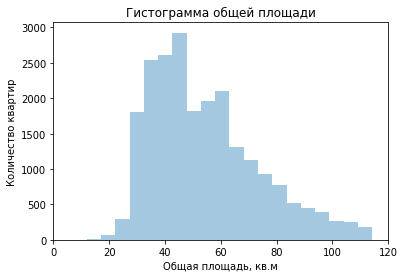

In [33]:
# Построим диаграмму для объектов с площадью менее 120 кв.м.
sns.distplot(data['total_area'], kde=False, bins=20, color='tab:blue')
plt.xlim(0, 120)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Количество квартир')
plt.show()

##### Жилая площадь

In [34]:
kingston('living_area')

[2.0, 73.45]

In [35]:
data['living_area'].describe()

count    22682.000000
mean        31.526821
std         13.752675
min          2.000000
25%         18.700000
50%         30.000000
75%         40.600000
max         76.700000
Name: living_area, dtype: float64

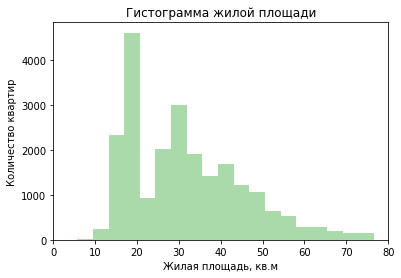

In [36]:
# Построим диаграмму для объектов с площадью менее 80 кв.м.
sns.distplot(data['living_area'], kde=False, bins=20, color='tab:green')
plt.xlim(0, 80)
plt.title('Гистограмма жилой площади')
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Количество квартир')
plt.show()

##### Площадь кухни

In [37]:
kingston('kitchen_area')

[1.3, 17.0]

In [38]:
data['kitchen_area'].describe()

count    22250.000000
mean         9.417841
std          3.177523
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         19.450000
Name: kitchen_area, dtype: float64

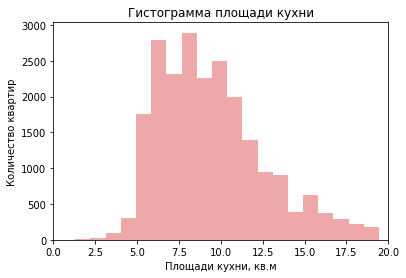

In [39]:
# Построим диаграмму для объектов с площадью менее 20 кв.м.
sns.distplot(data['kitchen_area'], kde=False, bins=20, color='tab:red')
plt.xlim(0, 20)
plt.title('Гистограмма площади кухни')
plt.xlabel('Площади кухни, кв.м')
plt.ylabel('Количество квартир')
plt.show()

##### Цена объекта

In [40]:
kingston('last_price')

[430000.0, 10049999.38]

In [41]:
kingston('price_sq_meter')

[22604.17, 161437.5]

In [42]:
data['last_price'].describe()

count    2.151800e+04
mean     4.837339e+06
std      2.215581e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      1.186686e+07
Name: last_price, dtype: float64

In [43]:
data['price_sq_meter'].describe()

count     21337.000000
mean      92035.920662
std       29556.304607
min        7962.962963
25%       74666.666667
50%       92727.272727
75%      109375.000000
max      312240.000000
Name: price_sq_meter, dtype: float64

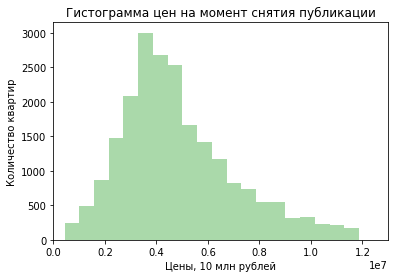

In [44]:
sns.distplot(data['last_price'], kde=False, bins=20, color='tab:green')
plt.xlim(0, 13000000)
plt.title('Гистограмма цен на момент снятия публикации')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.ylabel('Количество квартир')

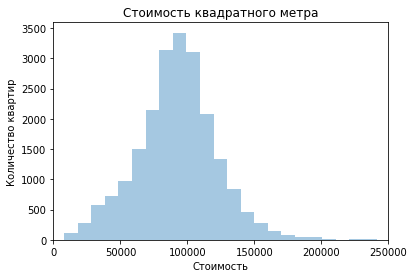

In [45]:
# Работаем с ценой за квадрат
sns.distplot(data['price_sq_meter'], kde=False, bins=30, color='tab:blue')
plt.xlim(0, 250000)
plt.title('Стоимость квадратного метра')
plt.xlabel('Стоимость')
_ = plt.ylabel('Количество квартир')

##### Количество комнат

In [46]:
kingston('rooms')

[0.0, 5.0]

In [47]:
data['rooms'].describe()

count    23565.000000
mean         2.013028
std          0.987466
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

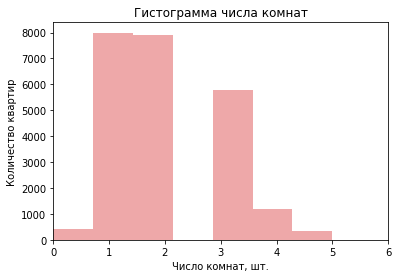

In [48]:
sns.distplot(data['rooms'], kde=False, bins=7, color='tab:red')
plt.xlim(0, 6)
plt.title('Гистограмма числа комнат')
plt.xlabel('Число комнат, шт.')
_ = plt.ylabel('Количество квартир')

##### Высота потолков

In [49]:
kingston('ceiling_height')

[2.25, 3.05]

In [50]:
data['ceiling_height'].describe()

count    21837.000000
mean         2.659333
std          0.143003
min          2.250000
25%          2.550000
50%          2.640000
75%          2.750000
max          3.050000
Name: ceiling_height, dtype: float64

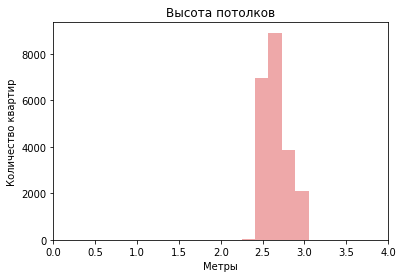

In [51]:
sns.distplot(data['ceiling_height'], kde=False, bins=5, color='tab:red')
plt.xlim(0, 4)
plt.title('Высота потолков')
plt.xlabel('Метры')
_ = plt.ylabel('Количество квартир')

##### Этаж квартиры

In [52]:
kingston('floor')

[1.0, 17.0]

In [53]:
data['floor'].describe()

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

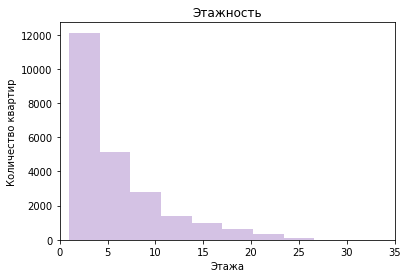

In [54]:
sns.distplot(data['floor'], kde=False, bins=10, color='tab:purple')
plt.xlim(0, 35)
plt.title('Этажность')
plt.xlabel('Этажа')
_ = plt.ylabel('Количество квартир')

##### Тип этажа квартиры («первый», «последний», «другой»)

In [55]:
data['floor_group'].describe()

count      23565
unique         3
top       другой
freq       17326
Name: floor_group, dtype: object

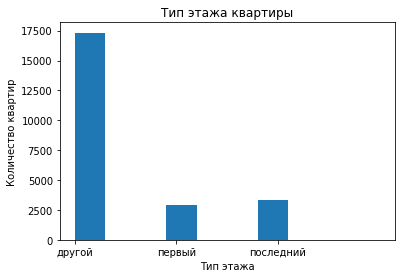

In [56]:
plt.hist(data['floor_group'], bins=10, range=(0,3))
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

##### Общее количество этажей в доме

In [57]:
kingston('floors_total')

[1.0, 32.5]

In [58]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

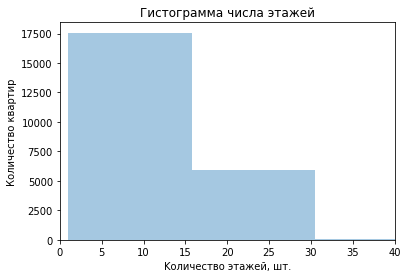

In [59]:
sns.distplot(data['floors_total'], kde=False, bins=4, color='tab:blue')
plt.xlim(0, 40)
plt.title('Гистограмма числа этажей')
plt.xlabel('Kоличество этажей, шт.')
_ = plt.ylabel('Количество квартир')

##### Расстояние до центра города в метрах

In [60]:
kingston('city_centers_nearest')

[181.0, 26855.5]

In [61]:
data['city_centers_nearest'].describe()

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

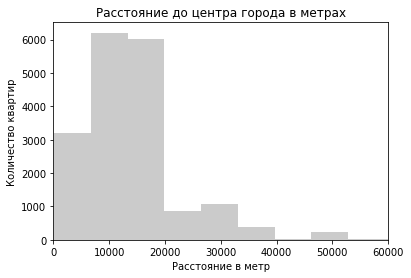

In [62]:
sns.distplot(data['city_centers_nearest'], kde=False, bins=10, color='tab:grey')
plt.xlim(0,60000 )
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние в метр')
_ = plt.ylabel('Количество квартир')

##### Расстояние до ближайшего аэропорта

In [63]:
kingston('airports_nearest')

[0.0, 65335.0]

In [64]:
data['airports_nearest'].describe()

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

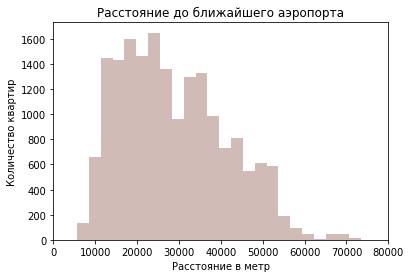

In [65]:
sns.distplot(data['airports_nearest'], kde=False, bins=30, color='tab:brown')
plt.xlim(0,80000 )
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние в метр')
_ = plt.ylabel('Количество квартир')

##### Расстояние до ближайшего парка

In [66]:
kingston('ponds_nearest')

[13.0, 1344.0]

In [67]:
data['ponds_nearest'].describe()

count    9036.000000
mean      518.289509
std       278.009558
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

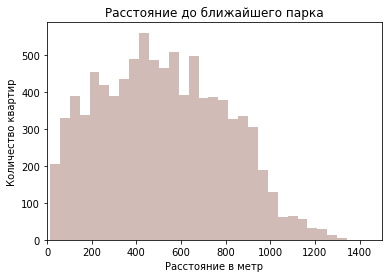

In [68]:
sns.distplot(data['ponds_nearest'], kde=False, bins=30, color='tab:brown')
plt.xlim(0,1500)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние в метр')
_ = plt.ylabel('Количество квартир')

##### День и месяц публикации объявления

In [69]:
kingston('weekday_exposition')

[0.0, 6.0]

In [70]:
data['weekday_exposition'].describe()

count    23565.000000
mean         2.567367
std          1.788279
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

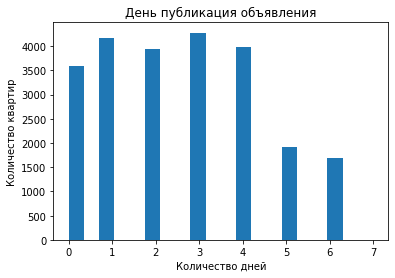

In [71]:
plt.hist(data['weekday_exposition'], bins=20, range=(0,7))
plt.title('День публикация объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

In [72]:
kingston('month_exposition')

[1.0, 12.0]

In [73]:
data['month_exposition'].describe()

count    23565.000000
mean         6.401570
std          3.492948
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

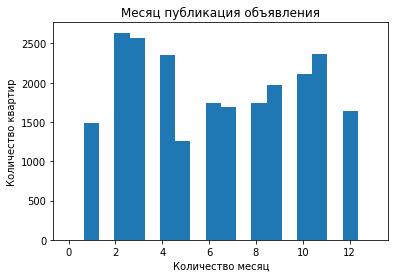

In [74]:
plt.hist(data['month_exposition'], bins=20, range=(0,13))
plt.title('Месяц публикация объявления')
plt.xlabel('Количество месяц')
plt.ylabel('Количество квартир')
plt.show()

##### Вывод

Рынок жилья представлен объектами общей площадью от 12 до 115 кв.м. В основном это жилье общей площадью от 30 до 65 кв.м. В жилой площади квартиры преобладает диапазон 13-76 кв.м., и с несколько меньшим, но ожидаемым ожидаемым пиком в диапазоне 18-40 кв.м. Размер площади кухни-в основном от 5 до 19 кв.м., и с несколько меньшим, с пиком 9 кв.м. Это стандартные небольшие квартиры, которые очень распространены в наших городах и являются типичными для среднестатистической квартиры эконом-класса. Подавляющее большинство квартир- 1-3 комнатные, с высотой потолка 2,25-3,05 м..

Цены на квартиры в основном находятся в диапазоне 4- 12 млн.руб. с пиком в области 3-5 млн.руб.(небольшие квартиры эконом-класса). Стоимость квадратного метра недвижимости варьируется от 70 до 312 тыс.руб. с пиком в области 100 тыс.руб..

Этаж квартиры находится в диапазоне 1- 17 этажность, с пиком 5 этажей и бывает до 33 этажей. В основном продажей квартиры находится ни на первом и последным этажей. Количество этажей в доме от 1 -до 32 шт., с пиком 15 этажность,но встречаются редкие варианты до 60 этажей.

Расстояние до центра города находится в диапазоне 181 - 65965 м., с пиком до 20000 метр до центр. Расстояние до ближайшего аэропорта от 0 до 84865 метрб с пиком 15000 м. до 30.000 м. Расстояние до ближайшего парка в метрах от 113 до 1400 б с пиком от 293 до 730 м.

Общее время продажи жилой можно увидеть, что пик продаж приходится на 60 день с момента публикации. 

#### Исследование количества дней для продажи квартиры.

Время продажи (медиана): 85 

Время продажи (среднее): 128 



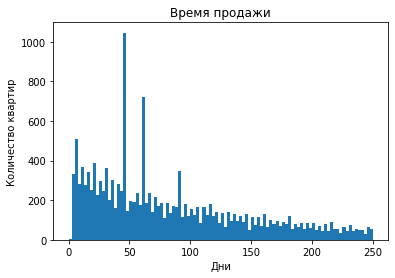

count    18721.000000
mean       128.299343
std        121.064671
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        509.000000
Name: days_exposition, dtype: float64

In [75]:
# Отбрасываем маркеры пустых значений
print('Время продажи (медиана):', round(data.query('days_exposition != 9999')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data.query('days_exposition != 9999')['days_exposition'].mean()),'\n')
# Гистограма времени продажи
plt.hist(data.query('days_exposition != 9999')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
# Изучаем значения срока продажи
data.query('days_exposition != 9999')['days_exposition'].describe()

##### Вывод

Медианное время продажи - 94 дней. Среднее время продажи - 186 день.
В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 43 дней и меньше. Долгой продажей - 237 дней  и дольше.

#### Исследование факторов, влияющих на полную стоимость квартиры.

##### Общей площади

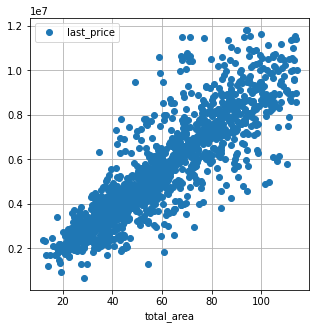

'Корреляция цены и общей площади:'

,last_price,total_area
last_price,1.000000,0.905474
total_area,0.905474,1.000000


In [76]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
display('Корреляция цены и общей площади:')
display(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr())

##### Жилой площади

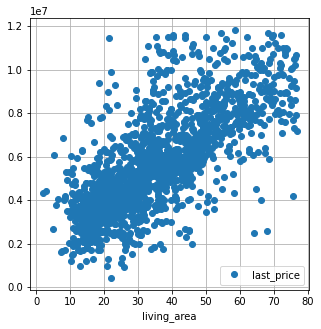

'Корреляция цены и  Жилой площади:'

,last_price,living_area
last_price,1.000000,0.728792
living_area,0.728792,1.000000


In [77]:
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
display('Корреляция цены и  Жилой площади:')
display(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr())

##### Площади кухни

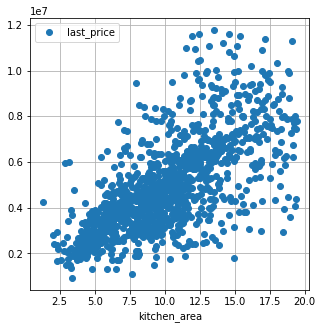

'Корреляция цены и  площади кухни:'

,kitchen_area,last_price
kitchen_area,1.000000,0.445589
last_price,0.445589,1.000000


In [78]:
(
     data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
display('Корреляция цены и  площади кухни:')
display(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr())

##### Количество комнат

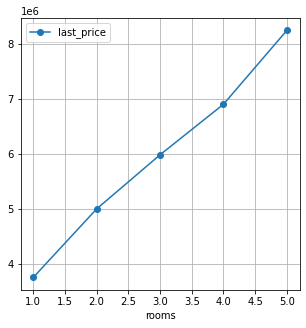

'Корреляция цены и количество комнат:'

,last_price,rooms
last_price,1.00000,0.53674
rooms,0.53674,1.00000


In [79]:
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
display('Корреляция цены и количество комнат:')
display(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr())

##### Типа этажа, на котором расположена квартира (первый, последний, другой)

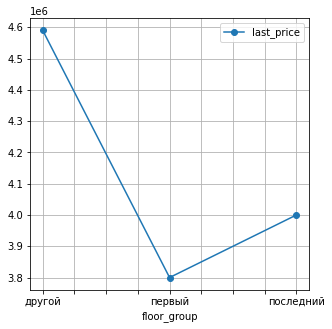

In [80]:
(
    data.pivot_table(index='floor_group', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()


##### Даты размещения (день недели, месяц, год)

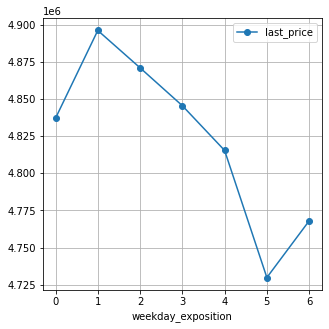

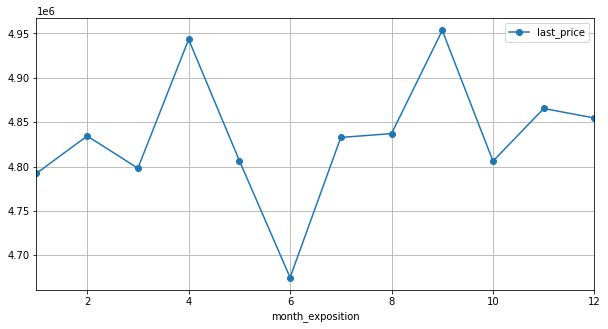

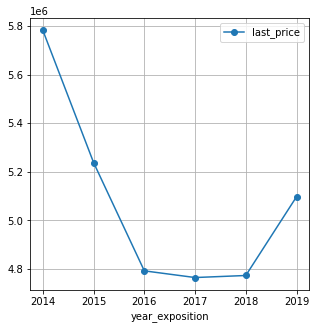

In [81]:

# Зависимость от дня размещения
(
    data.pivot_table(index='weekday_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    data.pivot_table(index='month_exposition', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    data.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

##### Вывод

Влияние на цену 1 кв.м. жилья выглядит следующим образом:

+  Общей площади:

Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая.

+ Жилой площади:

У квартир, находящихся в радиусе до 25 км от центра, верхняя граница стоимости кв.метра обратно пропорциональна удалению от центра, далее можно проследить падение верхней границы цены после незначительного пика в районе 25-35 км, и на расстоянии более 60 км стоимость падает значительно.


* Площади кухни:

Чем больше площадь кухни, тем выше стоимость.


* Количество комнат:

Чем больше количество комнаты, тем выше стоимость.

* Типа этажа, на котором расположена квартира (первый, последний, другой):


Самая низкая цена 1 кв.м.- у квартир на 1 этаже, последний этаж также "проседает" в стоимости. Цена остальных квартир также может зависеть от этажа, но на этот фактор будут наслаиваться еще и другие условия (вид из окна, качество жилья, район и тд)


- Даты размещения (день недели, месяц, год):

День недели: дороже всего квартиры, опубликованные в понедельник, дешевле всего - в субботу.
Месяц: дороже всего квартиры, продающиеся с апреля, дешевле всего - с июня.
Год: квартиры очень сильно подешевели в 2016-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, т.к. экономика и зарплаты скорее на подъёме.

#### Анализ десяти населённых пунктов с наибольшим числом объявлений, анализ стоимости квадратного метра.

In [82]:

data.groupby('locality_name').agg({'price_sq_meter':'mean'}).sort_values(by='price_sq_meter', ascending=False).head(20)

,price_sq_meter
locality_name,
посёлок Лисий Нос,121616.221359
Санкт-Петербург,105694.046907
Зеленогорск,102890.466601
Сестрорецк,101262.332858
Пушкин,100462.063435
Кудрово,99780.035133
деревня Мистолово,98549.976709
посёлок Левашово,96997.690531
Мурино,92722.708914


In [83]:
def locality_status(row):
    if row['locality_name'] == 'Санкт-Петербург':
        return 'Питер'
    else:
        return 'За Питером'

In [84]:
data['locality_status'] = data.apply(locality_status, axis=1)

In [85]:
data.groupby('locality_status').agg({'price_sq_meter':'mean'}).sort_values(by='price_sq_meter')

,price_sq_meter
locality_status,
За Питером,68293.708138
Питер,105694.046907


In [86]:
data.groupby('locality_status').agg({'price_sq_meter':'median'}).sort_values(by='price_sq_meter')

,price_sq_meter
locality_status,
За Питером,68571.428571
Питер,102063.492063


(0.0, 200000.0)

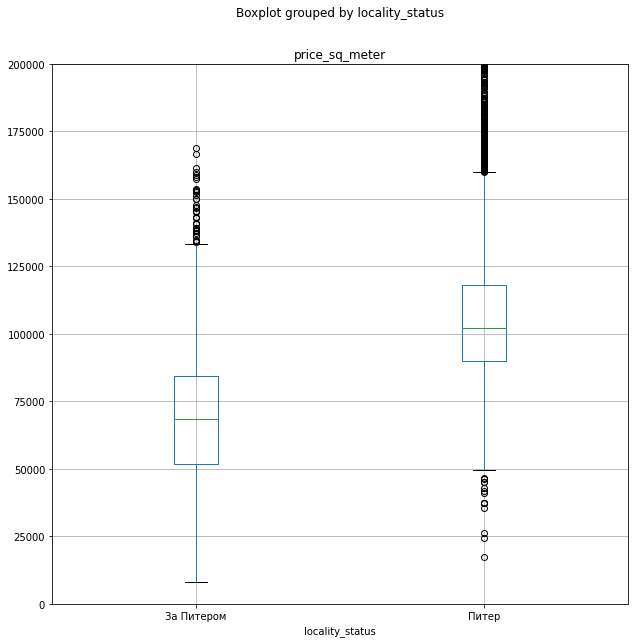

In [87]:
plot = data.boxplot('price_sq_meter', by='locality_status', figsize=(10,10))
plot.set_ylim(0,200000)

In [88]:
top_10_data = data.groupby('locality_name')\
    .agg({'locality_status':'count','price_sq_meter':'mean'})
top_10_data = top_10_data.sort_values('locality_status', ascending=False).head(11)

In [89]:
top_10_data = top_10_data.astype(int)
top_10_data.sort_values('price_sq_meter', ascending=False).head(11)

,locality_status,price_sq_meter
locality_name,,
Санкт-Петербург,15651,105694
Пушкин,369,100462
деревня Кудрово,299,92409
посёлок Парголово,327,90332
посёлок Мурино,520,85673
Петергоф,201,83461
посёлок Шушары,439,78578
Колпино,338,75221
Гатчина,307,68664


<AxesSubplot:ylabel='locality_name'>

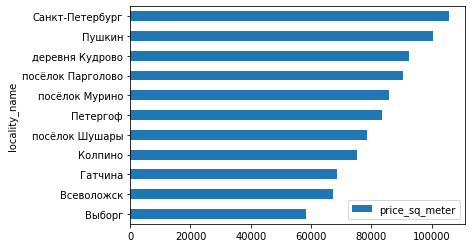

In [90]:

top_10_data.sort_values('price_sq_meter', ascending=True)\
    .drop('locality_status', axis=1).plot(kind='barh')

##### Вывод

Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также неболшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

#### Анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра.

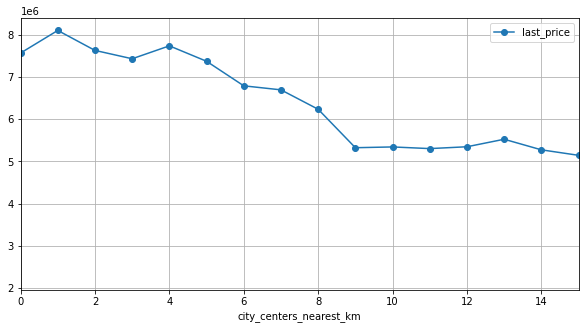

In [91]:
# Добавляем столбец с расстоянием до центра в км, округляем до целого
 
data['city_centers_nearest_km']  = data['city_centers_nearest_km'] .fillna(value=0).astype(int)
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

Центральная зона - это 7 км и меньше. Дальше 8 км средняя цена на квартиры резко снижается.